In [9]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import torch

from models.ddpg import DDPG
from models.model import OUNoise
from env.TradeEnv import TradeEnv

In [10]:
file_path = '../data/processed/'
df_macro = pd.read_csv(file_path + 'macro_data.csv')
df_stock = pd.read_csv(file_path + 'stock_data.csv')
df_factor = pd.read_csv(file_path + 'factor_data.csv')

env = TradeEnv(df_macro=df_macro, df_factor=df_factor, df_stock=df_stock)
hidden_size_list = [64] * 4
agent = DDPG(env=env, hidden_size_list=hidden_size_list)
# noise = OUNoise(action_dim=2)

Initialize trade environment...
Aligning df_macro, df_stock and df_factor...
df_macro shape:  (2674, 54)
df_stock shape:  (2674, 470)
df_factor shape:  (2674, 470)


In [11]:
batch_size = 128
rewards = []
avg_rewards = []

for episode in range(50):
    state = env.reset()
    # noise.reset()
    episode_reward = 0
    
    for i in range(1,5000):
        action = agent.get_action(state)
        action += np.random.randn() * 0.01
        # action = noise.get_action(action, i)
        next_state, reward, terminated = env.step(action) 
        if not terminated:
            agent.memory.push(state, action, reward, next_state, terminated)
        
            state = next_state
            episode_reward += reward

        if len(agent.memory) > 1e3:
            agent.update(batch_size) 
            if i % 100 == 0:
                print('{}, {:>4d}, {}: {:.7f}'.format(episode, i, action.round(3), episode_reward / i))

        if terminated:
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

0, 1100, [ 0.252 -0.397]: 0.0006203
0, 1200, [ 0.848 -0.948]: 0.0005947
0, 1300, [ 0.996 -1.002]: 0.0006611
1,  100, [ 0.756 -0.996]: 0.0009117
1,  200, [ 0.738 -0.997]: 0.0005616
1,  300, [-0.987 -1.009]: -0.0000627
1,  400, [-0.738 -0.976]: 0.0000246
1,  500, [-0.979 -0.964]: 0.0001414
1,  600, [-1.006 -0.97 ]: 0.0007161
1,  700, [-0.692 -0.134]: 0.0009047
1,  800, [0.959 0.901]: 0.0007254
1,  900, [1.018 1.016]: 0.0005563
1, 1000, [1.009 0.998]: 0.0008059
1, 1100, [0.986 0.985]: 0.0006049
1, 1200, [1.023 1.006]: 0.0005844
1, 1300, [-0.999 -0.119]: 0.0006486
2,  100, [-0.298 -0.997]: 0.0010117
2,  200, [0.97  0.995]: 0.0006459
2,  300, [0.948 0.993]: 0.0000001
2,  400, [0.522 1.   ]: 0.0001089
2,  500, [-1.003 -0.994]: 0.0003552
2,  600, [-1.009 -1.009]: 0.0009052
2,  700, [-1.005  0.963]: 0.0011392
2,  800, [-0.323  0.996]: 0.0010461
2,  900, [-0.318 -0.989]: 0.0009623
2, 1000, [0.97  0.979]: 0.0010503
2, 1100, [1.012 1.012]: 0.0008195
2, 1200, [0.987 0.897]: 0.0008023
2, 1300, [-1.

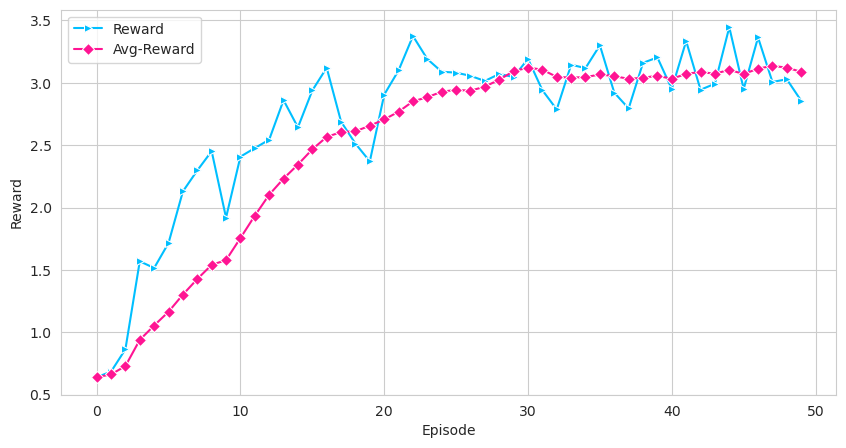

In [8]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(rewards, marker='>', color='deepskyblue', label='Reward')
sns.lineplot(avg_rewards, marker='D', color='deeppink', label='Avg-Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()